# ***Introduction***

The rapid growth of data-driven decision-making has significantly influenced the sports industry, particularly football analytics. Modern football games and simulations such as EA Sports FC (formerly FIFA) generate extensive datasets capturing player attributes, demographics, and performance metrics. Analyzing such datasets provides valuable insights into player distribution, positional trends, gender-based differences, and overall representation across nations and regions.


This project focuses on an **exploratory data analysis (EDA)** of an EAFC player dataset to uncover meaningful patterns and relationships within the data. The analysis examines key aspects such as player **positions, nationality distribution, continental representation, gender-wise comparisons, and attribute-based scoring**. Statistical normalization techniques are applied to ensure fair comparison across multiple attributes, followed by weighted scoring methods to evaluate overall player profiles.


Through **data preprocessing, visualization, and comparative analysis**, this project aims to demonstrate how raw sports data can be transformed into structured insights. The work not only highlights trends within the dataset but also showcases practical applications of data analytics concepts such as normalization, aggregation, and visualization, making it relevant for both sports analytics and data science learning contexts.

In [362]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [363]:
# Download latest version
path = kagglehub.dataset_download("flynn28/eafc26-player-database")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'eafc26-player-database' dataset.
Path to dataset files: /kaggle/input/eafc26-player-database


In [364]:
print(os.listdir(path))
main=pd.read_csv(os.path.join(path, 'EAFC26.csv'))

['EAFC26-Men.csv', 'EAFC26.csv', 'EAFC26-Women.csv']


In [365]:
main.head()

,ID,Rank,Name,GENDER,OVR,PAC,SHO,PAS,DRI,DEF,...,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,card
0,209331,1,Mohamed Salah,M,91,89,88,86,90,45,...,Premier League,Liverpool,"['Finesse Shot+', 'First Touch', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
1,227203,2,Alexia Putellas,F,91,82,89,90,91,72,...,Liga F Moeve,FC Barcelona,"['First Touch+', 'Finesse Shot', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
2,231747,3,Kylian Mbappé,M,91,97,90,81,92,37,...,LALIGA EA SPORTS,Real Madrid,"['Quick Step+', 'Acrobatic', 'Finesse Shot', '...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
3,241667,4,Aitana Bonmatí,F,91,85,87,86,91,77,...,Liga F Moeve,FC Barcelona,"['Technical+', 'First Touch', 'Incisive Pass',...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
4,231443,5,Ousmane Dembélé,M,90,91,88,83,93,50,...,Ligue 1 McDonald's,Paris SG,"['Rapid+', 'Inventive', 'Low Driven Shot', 'Pi...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...


In [366]:
main.shape

(17873, 59)

In [367]:
#Checking for null enteries
main.isna().sum()

,0
ID,0
Rank,0
Name,0
GENDER,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0


In [368]:
#Verifying if is null
totalNoOfKeepers=(main['Position']=='GK').sum()
totalNoOfOutfieldPlayers=(main['Position']!='GK').sum()
totalNoOfOutfieldPlayers+totalNoOfKeepers==main.shape[0]
#This verifies all null entries belong to those players who are not GK thus their keepings stats are null

np.True_

In [369]:
#Creating seperate sets for male players and
male_players=main[main.GENDER=='M'].drop('GENDER',axis=1)
female_player=main[main.GENDER=='F'].drop('GENDER',axis=1)

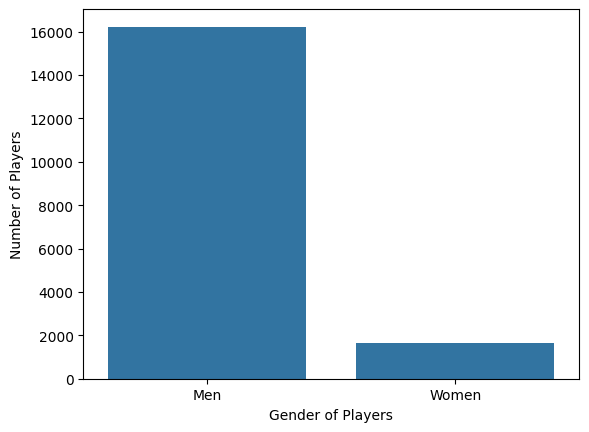

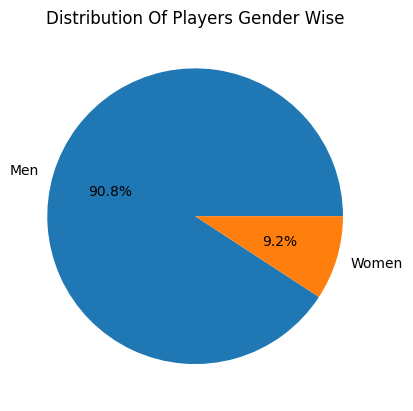

In [370]:
#Plotting a bar to check the difference between number of males and females
sns.barplot(y=(male_players.shape[0],female_player.shape[0]),x=('Men','Women'))
plt.xlabel("Gender of Players")
plt.ylabel('Number of Players')
plt.show()
#Pie Chart for the same
plt.pie((male_players.shape[0],female_player.shape[0]),labels=('Men','Women'),autopct="%1.1f%%")
plt.title("Distribution Of Players Gender Wise")
plt.show()

In [371]:
#All the possible positions in the database
list_of_positions=male_players['Position'].unique().tolist()
list_of_positions

['RM', 'ST', 'CDM', 'CB', 'CAM', 'LM', 'RB', 'CM', 'GK', 'LW', 'RW', 'LB']

In [372]:
#Creating a new column for main Position
attacker=['ST','LW','RW']
defender=['RB','LB','CB']
midfielder=['RM','LM','CDM','CAM','CM']

conditions=[
    male_players['Position'].isin(attacker),
    male_players['Position'].isin(midfielder),
    male_players['Position'].isin(defender)
]

choices=["Forward","Midfielder","Defender"]

male_players["Main_Position"]=np.select(conditions,choices,default="GK")
male_players[['Name','Position','Main_Position']]

,Name,Position,Main_Position
0,Mohamed Salah,RM,Midfielder
2,Kylian Mbappé,ST,Forward
4,Ousmane Dembélé,ST,Forward
5,Rodri,CDM,Midfielder
7,Virgil van Dijk,CB,Defender
...,...,...,...
17868,Aaron Vanlalrinchhana,RM,Midfielder
17869,Ma Haoqi,RM,Midfielder
17870,Yu Zhuowei,ST,Forward
17871,He Bizhen,CB,Defender


In [373]:
male_players.Main_Position.value_counts()

,count
Main_Position,
Midfielder,6079
Defender,5433
Forward,2900
GK,1816


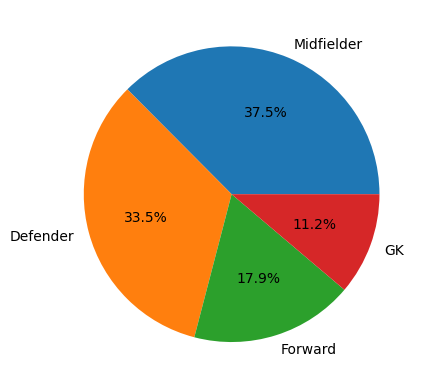

In [374]:
#Plotting it based on the number of players per positions

plt.pie(male_players.Main_Position.value_counts(),autopct='%1.1f%%',labels=('Midfielder','Defender','Forward','GK'))
plt.show()

**The Above graph clealy shows that the number of Goalkeepers are lowest which we can verify by normally checking a team composition as GK are usually 3 at max per squad**

Also the number of defenders and midfielders are also high compared to forwards, which we can also verify as there are generally less number of forwards due to varying squad formations.

Almost every team plays 4 at back and in the modern-era of football mid fielders are widespread have warying positions in mid compared to strikers.

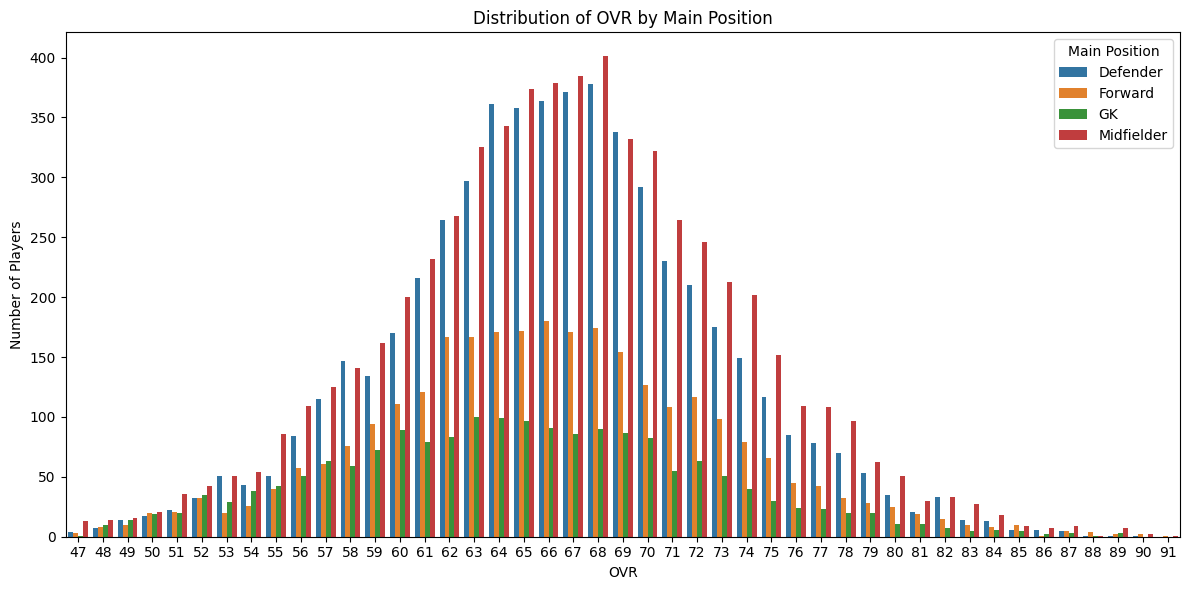

In [375]:
#Checking the Distribution of the rating at different positions
plt.figure(figsize=(12,6))
distributed_data=male_players.groupby('Main_Position')["OVR"].value_counts().reset_index(name='Count')
sns.barplot(data=distributed_data, x='OVR', y='Count', hue='Main_Position')

plt.title('Distribution of OVR by Main Position')
plt.xlabel('OVR')
plt.ylabel('Number of Players')

plt.legend(title='Main Position')
plt.tight_layout()
plt.show()

In [376]:
#Creating a seperate set for those having rating more than 80
elite_males=male_players[male_players['OVR']>=80]
elite_males.tail()

,ID,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,card,Main_Position
740,203263,741,Harry Maguire,80,35,57,70,65,80,82,...,Man Utd,['Aerial Fortress'],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...,Defender
741,269493,742,Alexsandro,80,66,40,63,59,80,81,...,LOSC Lille,"['Aerial Fortress', 'Anticipate', 'Block', 'In...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...,Defender
742,213661,743,Andreas Christensen,80,64,32,67,70,81,74,...,FC Barcelona,[],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...,Defender
744,202695,745,James Tarkowski,80,45,47,64,59,81,82,...,Everton,"['Aerial Fortress', 'Block', 'Intercept', 'Lon...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...,Defender
746,189881,747,Chris Smalling,80,45,47,57,59,83,77,...,Al Fayha,['Jockey'],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...,Defender


<Axes: xlabel='OVR', ylabel='count'>

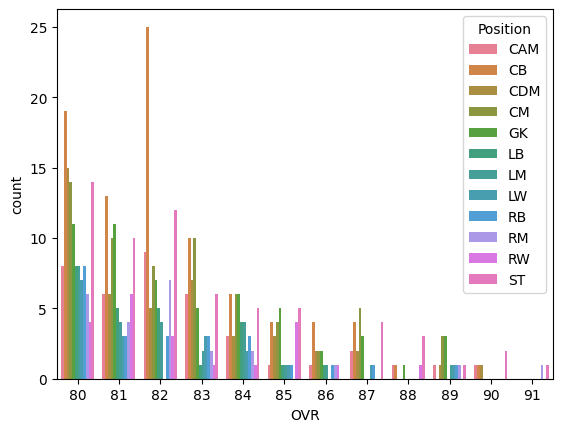

In [377]:
#Distribution of Positions of Elite players(OVR>79)
elite_data=elite_males.groupby('Position')['OVR'].value_counts().rename('count').reset_index()
sns.barplot(data=elite_data,x='OVR',y='count',hue='Position')

In [378]:
print(f"The number of unique teams of elite players are {len(elite_males['Team'].unique().tolist())}")

The number of unique teams of elite players are 92


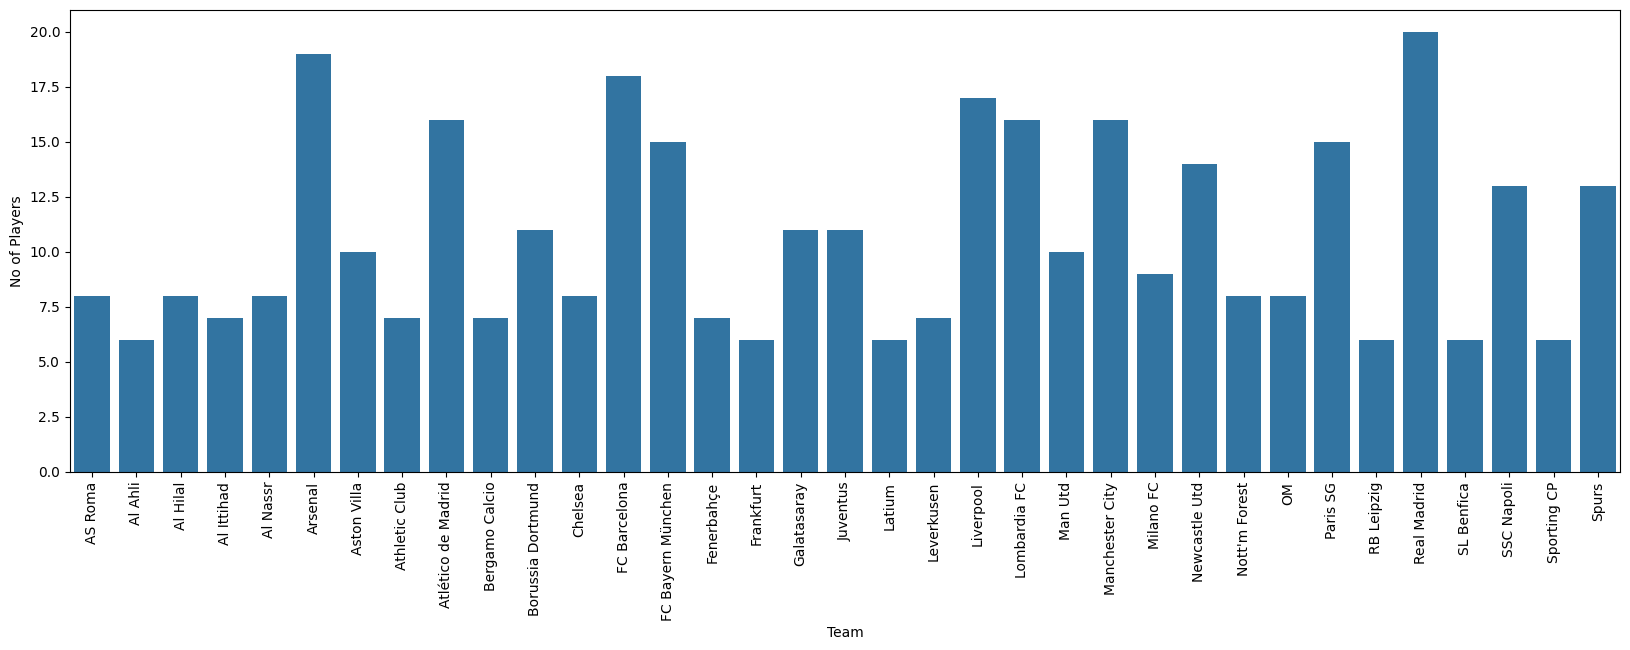

In [379]:
#distribution of elite players among various clubs
teams=elite_males.groupby("Team")["Team"].value_counts().rename('count').reset_index()
m=teams['count'].mean()
plt.figure(figsize=(20,6))
sns.barplot(data=teams[teams['count']>m],x='Team',y='count')
plt.xticks(rotation=90)
plt.ylabel('No of Players')
plt.show()

<Axes: >

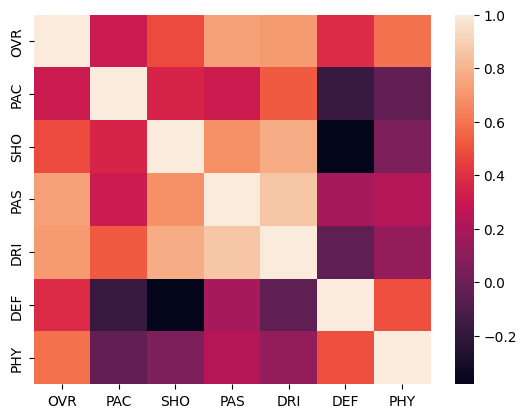

In [380]:
#Collinearity between the main numeric values

main_people_numeric_values=main.copy()
main_people_numeric_values=main_people_numeric_values[['Name','OVR','PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]
sns.heatmap(main_people_numeric_values.select_dtypes(include='number').corr())

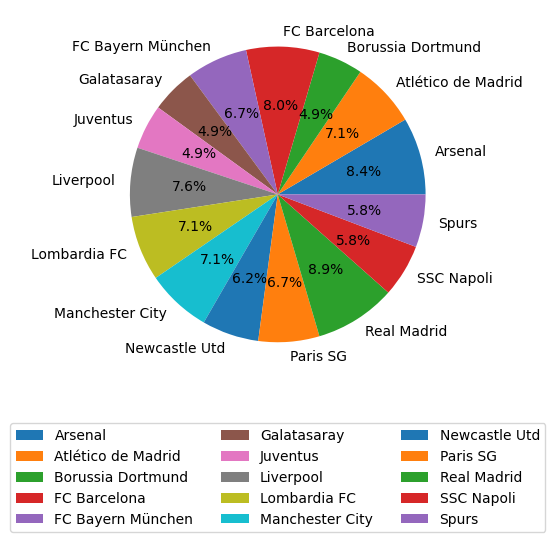

In [381]:
#Player distribution of top teams

ml=elite_males.groupby('Team').size().reset_index()
ml=ml[ml[0]>10]
plt.pie(x=ml[0],labels=ml['Team'],autopct='%1.1f%%')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()

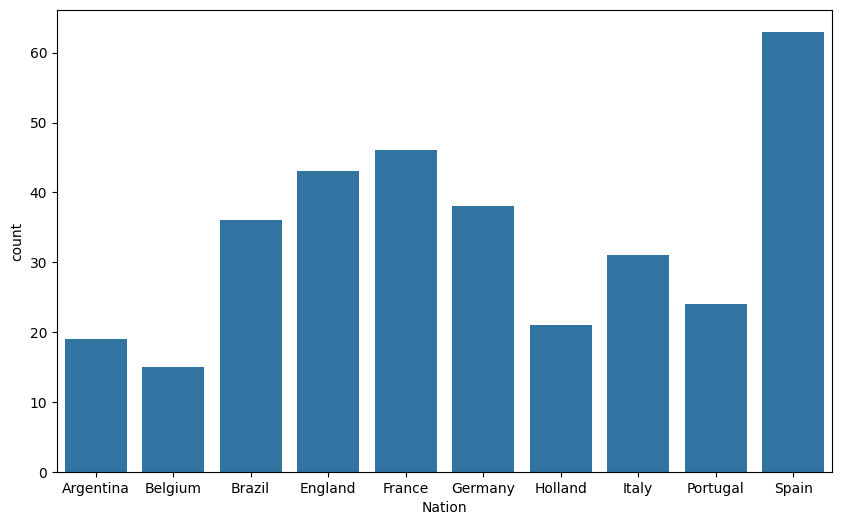

In [382]:
#Finding out what nationality has the most high rated players

nation_elites=elite_males.groupby('Nation').size().rename('count').reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=nation_elites[nation_elites['count']>10],x='Nation',y='count')
plt.show()

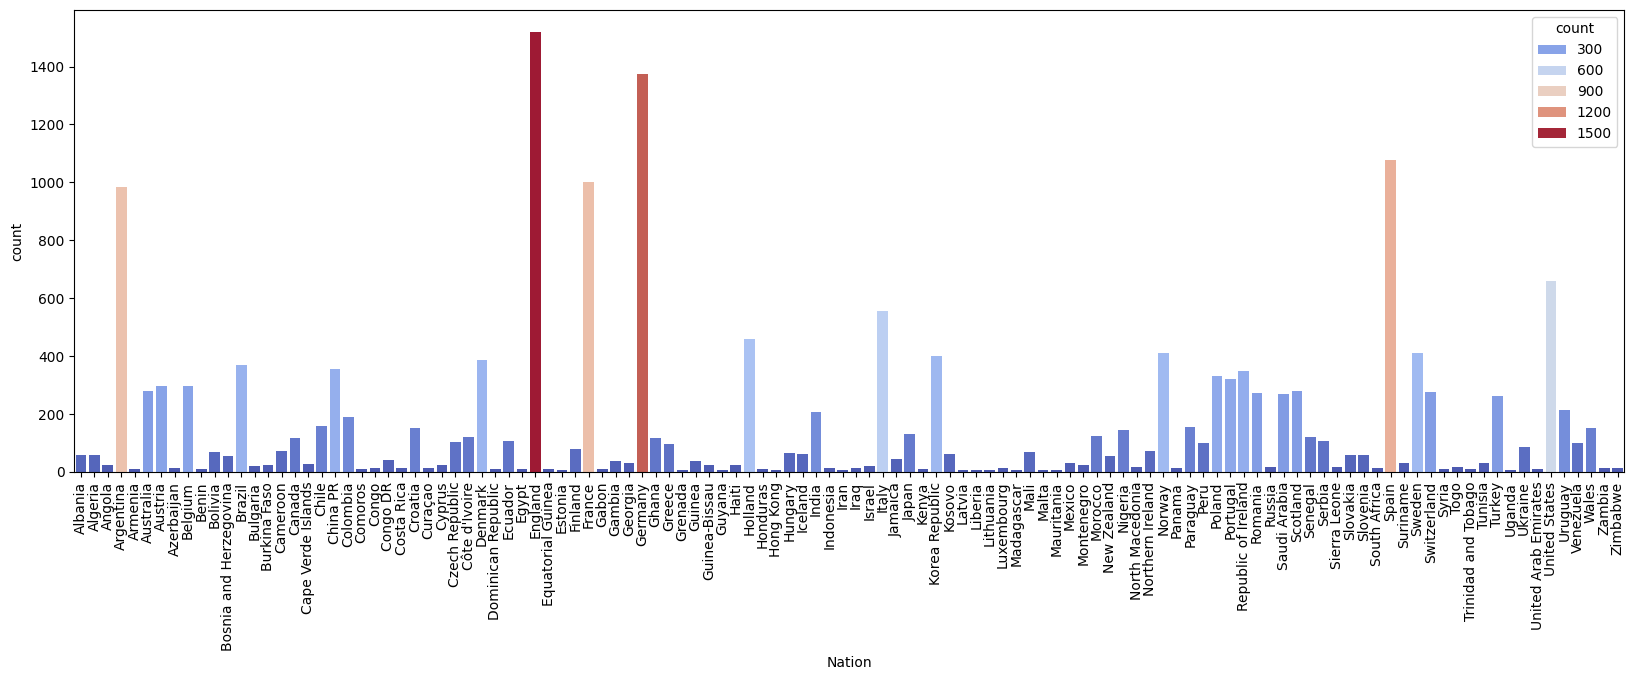

In [383]:
#Plotting a graph to find the nationalities and players

nation_number=main.groupby('Nation')['Nation'].size().rename('count').reset_index()
nation_number=nation_number[nation_number['count']>5]
plt.figure(figsize=(20,6))
sns.barplot(data=nation_number,x='Nation',y='count',hue='count',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Finding out all the unique nations from the dataset, using which we will merge another dataset containing its population and continent to help us in the analysis of regions which create more players than others.

In [384]:
unique_nations=main.groupby('Nation')['Nation'].value_counts().reset_index()
unique_nations_names=unique_nations['Nation'].unique()
unique_nations_names.size

157

In [385]:
countries_df=pd.read_excel('countries_continent_population.xlsx')
countries_df.shape

(157, 3)

In [386]:
fifa_merged=main.merge(countries_df,left_on='Nation',right_on='Country',how='left')
fifa_merged.drop('Country',axis=1)
fifa_merged.shape

(17873, 62)

In [387]:
fifa_merged.Continent.isna().value_counts()

,count
Continent,
False,17873


Verifying the continents to ensure nothing unnecessary is in the database.

In [388]:
fifa_merged['Continent'].value_counts()

,count
Continent,
Europe,10992
South America,2478
Asia,1546
Africa,1265
North America,981
Oceania,333
Asia/Europe,262
Europe/Asia,16


We found that there are two seperate unique continents for ASIA/Europe, these are those countries which share boundaries in both, since we cannot keep them as a unique continent, we will classify them considering if there nations league can take part in the Euros.

In [389]:
fifa_merged[['Nation','Continent']].loc[fifa_merged['Continent']=='Europe/Asia'].value_counts()

,,count
Nation,Continent,
Russia,Europe/Asia,16


In [390]:
fifa_merged[['Nation','Continent']].loc[fifa_merged['Continent']=='Asia/Europe'].value_counts()

,,count
Nation,Continent,
Turkey,Asia/Europe,262


Since both the nations could take part in the Euros we will consider them as European.

In [391]:
country_map={'Asia/Europe':'Europe','Europe/Asia':'Europe'}
fifa_merged['Continent']=fifa_merged['Continent'].replace(country_map)

In [392]:
fifa_merged['Continent'].value_counts().reset_index()

,Continent,count
0,Europe,11270
1,South America,2478
2,Asia,1546
3,Africa,1265
4,North America,981
5,Oceania,333


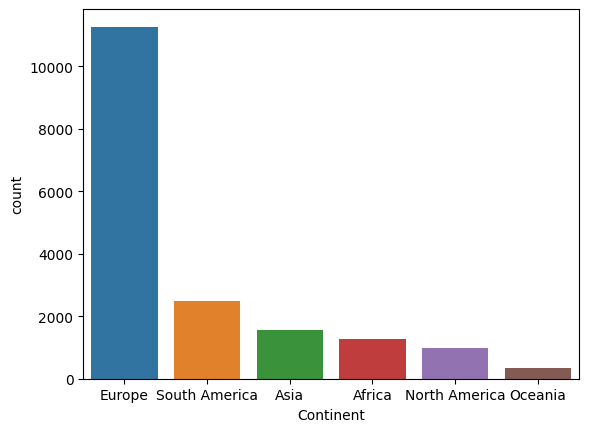

In [393]:
sns.barplot(data=fifa_merged['Continent'].value_counts().reset_index(),x='Continent',y='count',hue='Continent')
plt.show()

In [394]:
players_continents=fifa_merged.drop_duplicates(subset=['Nation']).groupby('Continent')['Population'].sum().reset_index()
players_continents

,Continent,Population
0,Africa,1263050000
1,Asia,4326000000
2,Europe,828829000
3,North America,591060000
4,Oceania,32530000
5,South America,425320000


In [395]:
players_continents=players_continents.merge(fifa_merged['Continent'].value_counts().rename('count').reset_index().rename(columns={'index':'Continent'}),on='Continent',how='right')
players_continents

,Continent,Population,count
0,Europe,828829000,11270
1,South America,425320000,2478
2,Asia,4326000000,1546
3,Africa,1263050000,1265
4,North America,591060000,981
5,Oceania,32530000,333


Now we will use Players per Million for a better fair comparision of the country.

In [396]:
player_count=unique_nations.copy()
player_count

,Nation,count
0,Afghanistan,1
1,Albania,57
2,Algeria,57
3,Andorra,1
4,Angola,22
...,...,...
152,Vanuatu,1
153,Venezuela,99
154,Wales,150
155,Zambia,12


In [397]:
# countries_df dataframe where population of every country is stored
# player_count for nations and player number
population_main=player_count.merge(countries_df,left_on='Nation',right_on='Country',how='inner')
population_main.drop('Country',axis=1,inplace=True)

In [398]:
population_main['Players Per Million']=population_main['count']/population_main['Population']*1_000_000
population_main

,Nation,count,Continent,Population,Players Per Million
0,Afghanistan,1,Asia,42000000,0.023810
1,Albania,57,Europe,2800000,20.357143
2,Algeria,57,Africa,46000000,1.239130
3,Andorra,1,Europe,77000,12.987013
4,Angola,22,Africa,36000000,0.611111
...,...,...,...,...,...
152,Vanuatu,1,Oceania,330000,3.030303
153,Venezuela,99,South America,28000000,3.535714
154,Wales,150,Europe,3100000,48.387097
155,Zambia,12,Africa,20000000,0.600000


In [399]:
# country_map={'Asia/Europe':'Europe','Europe/Asia':'Europe'}
population_main['Continent']=population_main['Continent'].replace(country_map)
population_main

,Nation,count,Continent,Population,Players Per Million
0,Afghanistan,1,Asia,42000000,0.023810
1,Albania,57,Europe,2800000,20.357143
2,Algeria,57,Africa,46000000,1.239130
3,Andorra,1,Europe,77000,12.987013
4,Angola,22,Africa,36000000,0.611111
...,...,...,...,...,...
152,Vanuatu,1,Oceania,330000,3.030303
153,Venezuela,99,South America,28000000,3.535714
154,Wales,150,Europe,3100000,48.387097
155,Zambia,12,Africa,20000000,0.600000


In [400]:
population_main.loc[population_main['Continent']=='Asia/Europe']

,Nation,count,Continent,Population,Players Per Million


In [401]:
fig=px.scatter(population_main,x='Population',y='count',size='Players Per Million',hover_name='Nation',color='Continent',log_x=True,size_max=60)
fig.show()

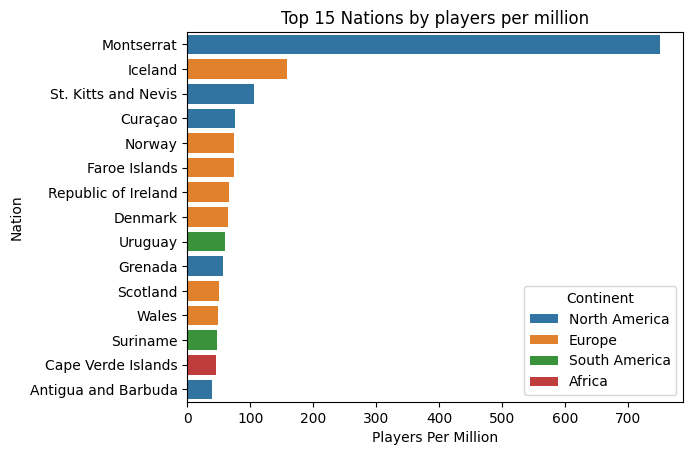

In [402]:
top15=population_main.sort_values('Players Per Million',ascending=False).head(15)
sns.barplot(top15,x='Players Per Million',y='Nation',hue='Continent')
plt.title('Top 15 Nations by players per million')
plt.show()

In [403]:
map={
    "Wales":'United Kingdom',
    "England":'United Kingdom',
}
population_main=population_main.replace(map)

In [404]:
fig2=px.choropleth(
    population_main,
    locations="Nation",
    locationmode='country names',
    color='Players Per Million',
    hover_name='Nation',
    color_continuous_scale='Viridis',
    range_color=[0,population_main['Players Per Million'].quantile(.75)]
)
fig2.update_layout(
    geo=dict(showframe=False,showcoastlines=False)
)
fig2.show()

In [405]:
population_median=population_main['Population'].median()
player_median=population_main['count'].median()

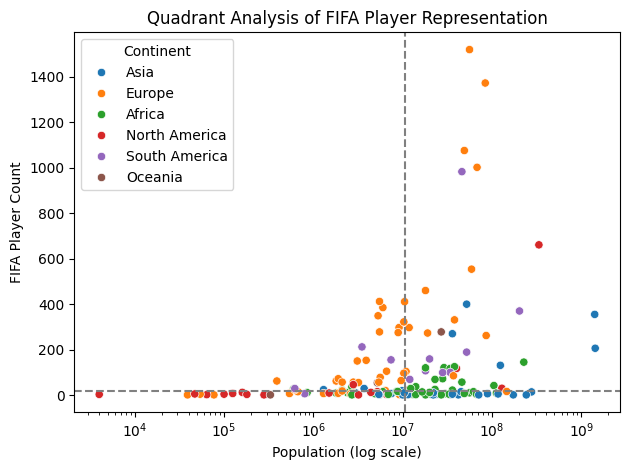

In [406]:
sns.scatterplot(data=population_main,x='Population',y='count',hue='Continent')
plt.axvline(population_median, linestyle="--", color="gray")
plt.axhline(player_median, linestyle="--", color="gray")
plt.xscale("log")
plt.title("Quadrant Analysis of FIFA Player Representation")
plt.xlabel("Population (log scale)")
plt.ylabel("FIFA Player Count")
plt.tight_layout()
plt.show()

In [407]:
fig3=px.scatter(population_main,x='Population',y='count',log_x=True,hover_name='Nation',color='Continent',size='count')
fig3.add_vline(
    x=population_median,
    line_dash="dash",
    line_color="red",
)
fig3.add_hline(
    y=player_median,
    line_dash='dash',
    line_color='red',
    annotation_text=f"Median: {player_median:,.0f}",
    annotation_position="bottom right"
)

fig3.show()

# **Auditing EA's Internal Rating Consistency**

This analysis evaluates whether EA's **Overall (OVR**) ratings are internally consistent with the underlying player attributes. Rather than treating the provided ratings as ground truth, the goal is to assess how coherently these ratings can be reconstructed from role-relevant performance indicators.

To maintain methodological control and avoid population-mixing bias, the initial audit is restricted to **male Central Midfielders (CM)**. This position was chosen due to its strong reliance on technical, cognitive, and physical attributes, making it well-suited for consistency analysis.

A carefully selected subset of CM-relevant attributes is used to construct an expected performance-based score, which is then compared against EA's assigned OVR ratings to identify systematic deviations.

In [408]:
#Now we will Audit EA's internal rating consistency

men_cm=male_players.copy()
men_cm['Position']

,Position
0,RM
2,ST
4,ST
5,CDM
7,CB
...,...
17868,RM
17869,RM
17870,ST
17871,CB


In [409]:
men_cm_ovr=men_cm=male_players.copy()
men_cm_ovr=men_cm_ovr[['OVR','Vision','Short Passing', 'Long Passing','Ball Control','Reactions','Stamina', 'Composure']][men_cm_ovr['Position']=='CM']

In [410]:
men_cm=men_cm[['Vision','Short Passing', 'Long Passing','Ball Control','Reactions','Stamina', 'Composure']][men_cm['Position']=='CM']
men_cm

,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure
14,78,90,89,88,88,87,88
18,76,90,88,91,87,90,90
23,78,88,88,88,89,93,84
50,93,92,93,89,89,66,87
51,78,90,87,88,87,87,90
...,...,...,...,...,...,...,...
17856,43,54,47,47,46,49,40
17857,39,57,53,41,46,62,43
17859,38,54,48,49,49,59,36
17860,36,50,46,48,50,61,40


In [411]:
#To find the number of Rows left
num_of_cm=men_cm.shape[0]
num_of_cm

1976

In [412]:
#Checks if any attribute is NULL
men_cm.isna().sum()

,0
Vision,0
Short Passing,0
Long Passing,0
Ball Control,0
Reactions,0
Stamina,0
Composure,0


In [413]:
attributes=[
    'Vision',
    'Short Passing',
    'Long Passing',
    'Ball Control',
    'Reactions',
    'Stamina',
    'Composure'
]

men_cm[attributes].describe()

,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,56.916498,69.008603,66.354757,67.763664,64.505061,70.797571,63.145243
std,10.348637,6.835605,7.138993,7.359851,7.681375,11.280565,9.675319
min,30.000000,48.000000,45.000000,40.000000,37.000000,31.000000,35.000000
25%,50.000000,65.000000,62.000000,63.000000,59.000000,63.000000,57.000000
50%,57.000000,69.000000,66.000000,68.000000,64.000000,72.000000,64.000000
75%,64.000000,74.000000,71.000000,72.000000,69.250000,79.000000,70.000000
max,93.000000,92.000000,93.000000,91.000000,91.000000,94.000000,91.000000


In [414]:
#Converting the pandas dataframe into a numpy array
cm_array=np.array(men_cm)
cm_array.shape

(1976, 7)

In [415]:
#Calculating the mean, standard deviation of all columns

cm_array_means=np.mean(cm_array,axis=0)
cm_array_std_dev=np.std(cm_array,axis=0)

In [416]:
#Z Normalizing
cm_z_norm=(cm_array-cm_array_means)/cm_array_std_dev

In [417]:
#verifying normalization

print(f"Mean: {cm_z_norm.mean(axis=0)}")

print(f"Standard Deviation: {cm_z_norm.std(axis=0)}")

Mean: [ 0.00000000e+00 -4.02736773e-16  5.17804423e-16  5.75338248e-17
  4.60270598e-16 -3.45202949e-16  3.45202949e-16]
Standard Deviation: [1. 1. 1. 1. 1. 1. 1.]


In [418]:
cm_z_norm.mean(axis=0)

array([ 0.00000000e+00, -4.02736773e-16,  5.17804423e-16,  5.75338248e-17,
        4.60270598e-16, -3.45202949e-16,  3.45202949e-16])

In [419]:
#Calculating using dot product

no_of_attributes=cm_z_norm.shape[1]
weights=np.ones(no_of_attributes)/no_of_attributes
cm_score=cm_z_norm @ weights
cm_score

array([ 2.58546937,  2.6450201 ,  2.5591754 , ..., -2.14540973,
       -2.21307731, -2.01628887])

In [420]:
cm_z_norm

array([[ 2.03783733,  3.07166818,  3.17285291, ...,  3.0594636 ,
         1.43667716,  2.56953261],
       [ 1.84452624,  3.07166818,  3.03274168, ...,  2.92924562,
         1.7026886 ,  2.77629645],
       [ 2.03783733,  2.77900846,  3.03274168, ...,  3.18968159,
         1.96870003,  2.15600491],
       ...,
       [-1.82838437, -2.19620684, -2.57170765, ..., -2.01903774,
        -1.04609626, -2.80632744],
       [-2.02169546, -2.78152628, -2.85193012, ..., -1.88881975,
        -0.8687553 , -2.39279974],
       [-1.34510666, -1.90354711, -1.87115149, ..., -2.80034563,
        -2.73083537, -1.04883473]])

In [421]:
men_cm=men_cm_ovr.copy()
men_cm['cm_score']=cm_score

In [422]:
men_cm['Deviation']=men_cm['OVR']-men_cm['cm_score']
men_cm

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,cm_score,Deviation
14,89,78,90,89,88,88,87,88,2.585469,86.414531
18,89,76,90,88,91,87,90,90,2.645020,86.354980
23,89,78,88,88,88,89,93,84,2.559175,86.440825
50,87,93,92,93,89,89,66,87,2.671698,84.328302
51,87,78,90,87,88,87,87,90,2.556373,84.443627
...,...,...,...,...,...,...,...,...,...,...
17856,47,43,54,47,47,46,49,40,-2.258621,49.258621
17857,47,39,57,53,41,46,62,43,-2.038556,49.038556
17859,47,38,54,48,49,49,59,36,-2.145410,49.145410
17860,47,36,50,46,48,50,61,40,-2.213077,49.213077


In [423]:
men_cm["Deviation"].describe()

,Deviation
count,1976.000000
mean,65.904352
std,6.131819
min,49.016289
25%,62.165828
50%,65.927023
75%,69.605526
max,86.440825


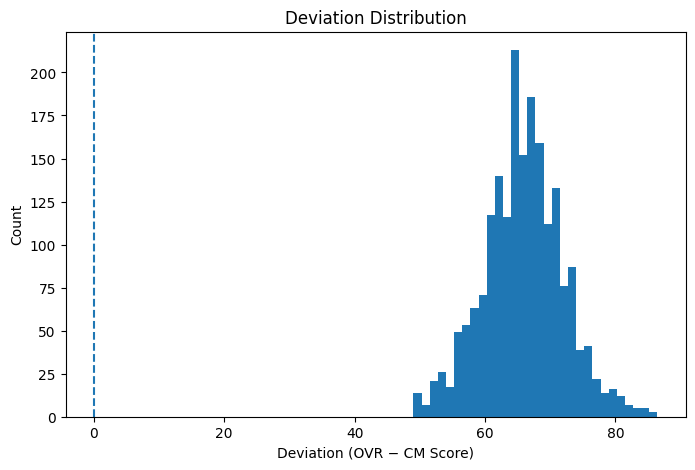

In [424]:
plt.figure(figsize=(8,5))
plt.hist(men_cm['Deviation'], bins=30)
plt.axvline(0, linestyle='--')
plt.xlabel('Deviation (OVR − CM Score)')
plt.ylabel('Count')
plt.title('Deviation Distribution')
plt.show()

An initial deviation analysis was attempted by directly subtracting the attribute-based CM score from EA's OVR. However, this approach was rejected because the two quantities exist on incompatible scales—OVR is an absolute rating, while the CM score is a standardized relative index. As a result, the resulting distribution primarily reflected the scale of OVR rather than meaningful disagreement. To ensure a valid comparison, OVR was subsequently standardized within the CM population before computing deviations.

In [425]:
ovr_mean = men_cm['OVR'].mean()
ovr_std = men_cm['OVR'].std()

men_cm['OVR_z'] = (men_cm['OVR'] - ovr_mean) / ovr_std

In [426]:
men_cm['OVR_z'].mean(), men_cm['OVR_z'].std()

(np.float64(1.150676495158057e-16), 1.000000000000004)

In [427]:
men_cm['Deviation_z'] = men_cm['OVR_z'] - men_cm['cm_score']
men_cm

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,cm_score,Deviation,OVR_z,Deviation_z
14,89,78,90,89,88,88,87,88,2.585469,86.414531,3.309139,0.723670
18,89,76,90,88,91,87,90,90,2.645020,86.354980,3.309139,0.664119
23,89,78,88,88,88,89,93,84,2.559175,86.440825,3.309139,0.749964
50,87,93,92,93,89,89,66,87,2.671698,84.328302,3.022580,0.350882
51,87,78,90,87,88,87,87,90,2.556373,84.443627,3.022580,0.466207
...,...,...,...,...,...,...,...,...,...,...,...,...
17856,47,43,54,47,47,46,49,40,-2.258621,49.258621,-2.708611,-0.449991
17857,47,39,57,53,41,46,62,43,-2.038556,49.038556,-2.708611,-0.670056
17859,47,38,54,48,49,49,59,36,-2.145410,49.145410,-2.708611,-0.563202
17860,47,36,50,46,48,50,61,40,-2.213077,49.213077,-2.708611,-0.495534


In [428]:
men_cm['Deviation_z'].describe()

,Deviation_z
count,1.976000e+03
mean,5.034210e-17
std,2.253918e-01
min,-8.466845e-01
25%,-1.427197e-01
50%,-3.568668e-03
75%,1.450612e-01
max,7.520643e-01


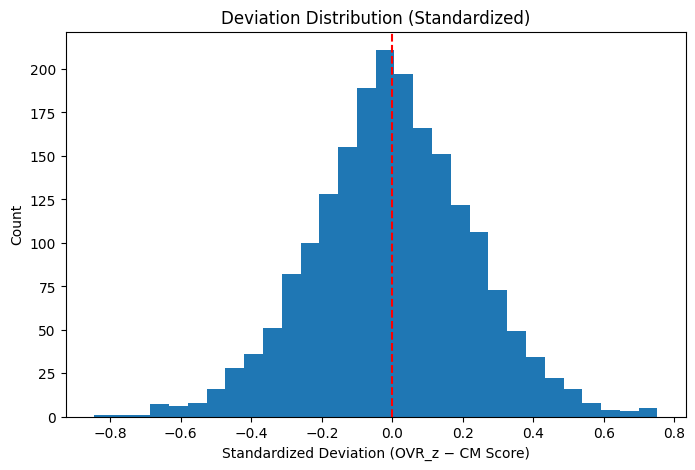

In [429]:
plt.figure(figsize=(8,5))
plt.hist(men_cm['Deviation_z'], bins=30)
plt.axvline(0, linestyle='--',color='red')
plt.xlabel('Standardized Deviation (OVR_z − CM Score)')
plt.ylabel('Count')
plt.title('Deviation Distribution (Standardized)')
plt.show()

The standardized deviation distribution is centered near zero and approximately symmetric, indicating that EA's OVR aligns with attribute-based CM performance on average, with deviations largely attributable to noise rather than systematic bias.”

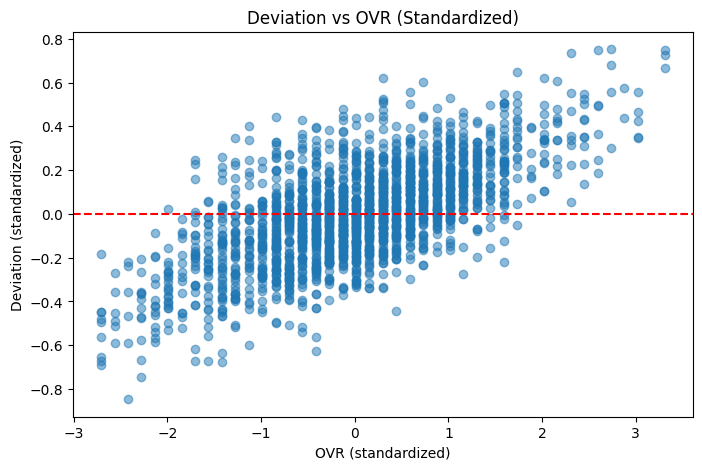

In [430]:
plt.figure(figsize=(8,5))
plt.scatter(men_cm['OVR_z'], men_cm['Deviation_z'], alpha=0.5)
plt.axhline(0, linestyle='--',color='red')
plt.xlabel('OVR (standardized)')
plt.ylabel('Deviation (standardized)')
plt.title('Deviation vs OVR (Standardized)')
plt.show()


# EA FC 2026 Player Rating Audit & Exploratory Analysis

## Overview

This project is a **data science analysis of EA FC 2026 player data**, combining broad exploratory analysis with a focused **audit of EA's Overall Rating (OVR) system**.

The project begins with dataset-wide exploration (player distribution, ratings, demographics) and then narrows down to a **role-specific audit of male Central Midfielders (CMs)** to study internal rating consistency.

---

## Motivation

EA FC player ratings are widely referenced, yet the logic behind OVR aggregation is not publicly available.
This project aims to:

* Understand the **structure and distribution** of the dataset
* Explore how ratings vary across **gender, position, and geography**
* Audit whether EA's OVR aligns with **attribute-based performance indicators**
* Identify **system-level patterns**, not just player-level anecdotes

The emphasis is on **reasoning, statistical discipline, and interpretability** rather than prediction.

---

## Dataset Exploration (EDA)

Before the audit, extensive exploratory analysis was performed to understand the dataset context.

### Key EDA Components

* **Player distribution analysis**

  * Gender-wise player counts
  * Position-wise player counts
* **Rating-based analysis**

  * OVR distributions
  * PPM (Price per Match / Points per Match) style metric analysis *(as applicable in dataset)*
  * Ranking-based comparisons
* **Geographical analysis**

  * Player count by country
  * Player count by continent
* **Visualizations**

  * Bar charts, histograms, and comparative plots
  * Distribution and proportion-based graphs to reveal dataset imbalance

These steps establish **context** and prevent isolated or misleading conclusions in later analysis.

---

## Focused Audit Scope

After dataset-level EDA, the analysis narrows to a controlled population:

* **Dataset:** EA FC 2026
* **Population:** Male players with primary position = Central Midfielder (CM)
* **Reason:** Ensures role-consistent and statistically meaningful comparisons

All statistics in the audit phase are computed **within the CM population**.

---

## Methodology (Audit Phase)

### 1. Attribute Selection

CM-relevant attributes were selected based on role requirements:

* Vision
* Short Passing
* Long Passing
* Ball Control
* Reactions
* Stamina
* Composure

---

### 2. Standardization

* All selected attributes were **z-score normalized within the CM population**
* EA's OVR was also standardized for scale-consistent comparison

This avoids invalid comparisons between absolute ratings and relative performance scores.

---

### 3. Composite CM Performance Score

A composite CM score was constructed by:

* averaging standardized CM attributes
* using equal weights as a neutral baseline

This score represents **relative CM performance**, not an absolute rating replacement.

---

### 4. Deviation Analysis (Core Audit)

The audit signal is defined as:

> **Deviation = Standardized OVR - Attribute-based CM Score**

This measures disagreement between EA's rating and attribute-driven evidence.

---

## Visual Analysis

The project relies heavily on **visual diagnostics**, including:

* **Histograms**

  * OVR distributions
  * Deviation distributions
* **Scatter plots**

  * Deviation vs OVR (elite-tier analysis)
* **Bar charts**

  * Player counts by gender, position, country, and continent
* **Comparative plots**

  * Ranking and rating-based comparisons

System-level patterns are analyzed **before** any player-level inspection.

---

## Key Findings

* EA's OVR is **aligned with attribute-based performance on average**
* Deviation distribution is centered near zero, indicating no global bias
* **Deviation magnitude increases at higher OVR levels**, suggesting:

  * non-linear aggregation
  * elite-tier inflation beyond attribute-only evidence
* Dataset-level EDA reveals clear **imbalances by gender, position, and geography**, which contextualize rating behavior

---

## Tools & Libraries

* Python
* NumPy
* Pandas
* Matplotlib
* Plotly

---

## Future Work

* Attribute weighting using variance or PCA
* Cross-position audits (CDM, CAM, wingers)
* Bias analysis using age, league, or reputation variables
* Rank-based consistency analysis
* Temporal comparison across EA FC editions




While EA's OVR is broadly aligned with CM-relevant attributes across the population, deviations increase systematically at higher rating tiers, suggesting that EA applies different aggregation logic for elite players.

In [431]:
female_cm=female_player[female_player.Position=='CM']

In [432]:
female_cm

,ID,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,card
1,227203,2,Alexia Putellas,91,82,89,90,91,72,80,...,Liga F Moeve,FC Barcelona,"['First Touch+', 'Finesse Shot', 'Gamechanger'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
3,241667,4,Aitana Bonmatí,91,85,87,86,91,77,75,...,Liga F Moeve,FC Barcelona,"['Technical+', 'First Touch', 'Incisive Pass',...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
15,237288,16,Mariona,89,78,84,86,90,76,79,...,Barclays WSL,Arsenal,"['Relentless+', 'First Touch', 'Incisive Pass'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
52,232075,53,Rose Lavelle,87,85,81,84,87,60,64,...,NWSL,Gotham FC,"['Pinged Pass+', 'Finesse Shot', 'First Touch'...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
55,233662,56,Sakina Karchaoui,87,89,76,87,88,77,69,...,Arkema PL,Paris SG,"['Intercept', 'Inventive', 'Jockey', 'Quick St...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,75279,15943,Napsugár Sinka,58,62,53,54,61,53,43,...,GPFBL,TSG Hoffenheim,[],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
16276,78782,16277,Leni Eggert,57,62,56,57,57,51,50,...,GPFBL,Hamburger SV,[],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
16349,272665,16350,Alba Caño,57,53,47,52,54,59,55,...,Liga F Moeve,FC Barcelona,[],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...
16623,271787,16624,Melina Kunkel,56,63,58,50,57,55,48,...,GPFBL,SV Werder Bremen,[],https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,https://ratings-images-prod.pulse.ea.com/FC26/...


In [433]:
female_cm.columns

Index(['ID', 'Rank', 'Name', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing',
       'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control',
       'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness',
       'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Position', 'Weak foot', 'Skill moves', 'Preferred foot',
       'Height', 'Weight', 'Alternative positions', 'Age', 'Nation', 'League',
       'Team', 'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'card'],
      dtype='object')

In [434]:
female_cm=female_cm[['OVR','Vision','Short Passing', 'Long Passing','Ball Control','Reactions','Stamina', 'Composure']]

In [435]:
female_cm_array=female_cm.copy()
female_cm_array

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure
1,91,88,91,90,92,91,85,92
3,91,74,91,90,91,91,82,85
15,89,84,89,89,89,86,93,84
52,87,74,91,85,88,86,86,79
55,87,86,89,87,88,84,90,88
...,...,...,...,...,...,...,...,...
15942,58,38,61,59,62,53,54,49
16276,57,48,62,56,61,52,51,45
16349,57,33,63,55,60,58,51,51
16623,56,35,59,45,63,59,34,49


In [436]:
female_cm_array.drop('OVR',inplace=True,axis=1)
female_cm_array

,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure
1,88,91,90,92,91,85,92
3,74,91,90,91,91,82,85
15,84,89,89,89,86,93,84
52,74,91,85,88,86,86,79
55,86,89,87,88,84,90,88
...,...,...,...,...,...,...,...
15942,38,61,59,62,53,54,49
16276,48,62,56,61,52,51,45
16349,33,63,55,60,58,51,51
16623,35,59,45,63,59,34,49


In [437]:
#Converting into numpy array
female_cm_array=np.array(female_cm_array)

In [438]:
female_cm_array

array([[88, 91, 90, ..., 91, 85, 92],
       [74, 91, 90, ..., 91, 82, 85],
       [84, 89, 89, ..., 86, 93, 84],
       ...,
       [33, 63, 55, ..., 58, 51, 51],
       [35, 59, 45, ..., 59, 34, 49],
       [37, 57, 50, ..., 52, 60, 49]])

In [439]:
female_cm_mean=female_cm_array.mean(axis=0)
female_cm_std=female_cm_array.std(axis=0)

In [440]:
print(f"MEAN: {female_cm_mean}")
print(f"MEAN: {female_cm_std}")

MEAN: [58.45679012 75.2345679  71.1399177  75.09876543 70.20576132 71.17283951
 65.79835391]
MEAN: [12.83165715  7.03302896  7.63445805  6.6275487   8.01790998  9.3967731
 10.24456482]


In [441]:
#Normalizing
female_cm_norm=(female_cm_array-female_cm_mean)/female_cm_std

In [442]:
#Verifying Normalization
print(f"MEAN: {female_cm_norm.mean(axis=0)}")
print(f"STD: {female_cm_norm.std(axis=0)}")

MEAN: [-8.77213254e-17 -2.92404418e-16  8.77213254e-16  1.16961767e-15
  2.33923534e-16  4.67847069e-16  0.00000000e+00]
STD: [1. 1. 1. 1. 1. 1. 1.]


In [443]:
#calculating dot product using weight of equal importance
no_of_attributes=female_cm_norm.shape[1]
weights=np.ones(no_of_attributes)/no_of_attributes
female_cm_score=female_cm_norm @ weights

In [444]:
female_cm['Deviation']=female_cm['OVR']-female_cm_score

/tmp/ipython-input-1604962942.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [445]:
female_ovr=female_cm['OVR']

In [446]:
female_ovr_mean=female_ovr.mean()
female_ovr_std=female_ovr.std()

In [447]:
female_ovr_mean , female_ovr_std

(np.float64(71.90946502057614), 6.861079665433444)

In [448]:
#Normalizing and calculation the deviation
female_cm['OVR_Z']=(female_ovr-female_ovr_mean)/female_ovr_std
female_cm['Deviation_Z']=female_cm.OVR_Z-female_cm_score

/tmp/ipython-input-2511963380.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2511963380.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [449]:
female_cm

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,Deviation,OVR_Z,Deviation_Z
1,91,88,91,90,92,91,85,92,88.687557,2.782439,0.469996
3,91,74,91,90,91,91,82,85,89.008197,2.782439,0.790636
15,89,84,89,89,89,86,93,84,86.935113,2.490940,0.426052
52,87,74,91,85,88,86,86,79,85.278367,2.199440,0.477807
55,87,86,89,87,88,84,90,88,84.997290,2.199440,0.196730
...,...,...,...,...,...,...,...,...,...,...,...
15942,58,38,61,59,62,53,54,49,59.828277,-2.027300,-0.199023
16276,57,48,62,56,61,52,51,45,58.893529,-2.173049,-0.279521
16349,57,33,63,55,60,58,51,51,58.889910,-2.173049,-0.283140
16623,56,35,59,45,63,59,34,49,58.339868,-2.318799,0.021069


In [450]:
female_cm.Deviation_Z.describe()

,Deviation_Z
count,2.430000e+02
mean,-8.699031e-16
std,2.224492e-01
min,-5.136836e-01
25%,-1.425654e-01
50%,-8.547529e-03
75%,1.429055e-01
max,7.906364e-01


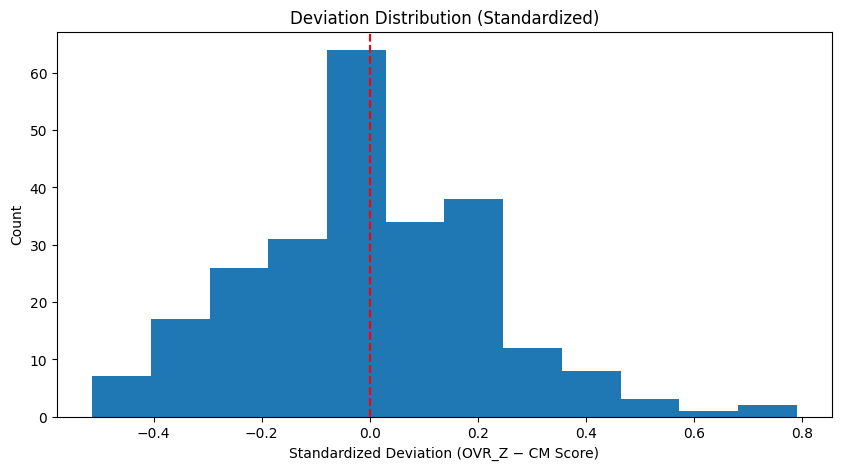

In [451]:
plt.figure(figsize=(10,5))
plt.hist(female_cm.Deviation_Z,bins=12)
plt.axvline(0,linestyle='--',color='red')
plt.xlabel('Standardized Deviation (OVR_Z − CM Score)')
plt.ylabel('Count')
plt.title('Deviation Distribution (Standardized)')
plt.show()

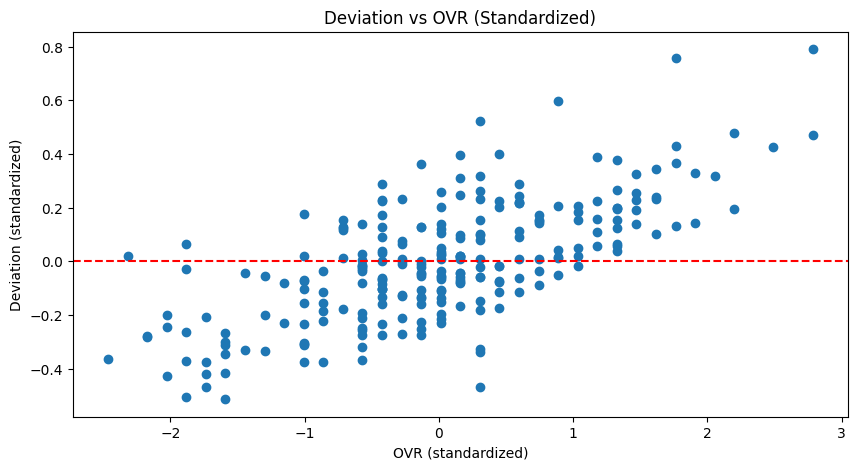

In [452]:
plt.figure(figsize=(10,5))
plt.scatter(female_cm['OVR_Z'],female_cm['Deviation_Z'])
plt.axhline(0, linestyle='--',color='red')
plt.xlabel('OVR (standardized)')
plt.ylabel('Deviation (standardized)')
plt.title('Deviation vs OVR (Standardized)')
plt.show()

**Insights: Standardized Deviation Analysis (Male vs Female CMs)**

Across both male and female datasets, standardized deviation distributions are centered around zero and exhibit similar dispersion, indicating strong alignment between overall ratings (OVR) and CM-specific composite scores for most players. **Extreme mismatches are limited**, supporting the effectiveness of the normalization and equal-weight aggregation methodology.

Deviation-OVR scatter plots reveal a consistent positive relationship in both datasets. Lower-rated players predominantly show negative deviations, suggesting potential undervaluation, while higher-rated players tend to exhibit positive deviations, indicating possible overvaluation relative to CM-specific attributes. The **female dataset closely mirrors the male results in trend and spread**, with differences primarily attributable to sample size rather than structural variation.

Overall, the consistency across genders indicates that **observed deviations reflect systemic properties of the rating framework rather than gender-specific effects**. This validates the standardized deviation approach as a robust tool for identifying positional rating inefficiencies in central midfielders.

**Target variable**

deviation = standardized_OVR − standardized_CM_score


**Population**
* Male Central Midfielders only
* Same filtered dataset you already used (no re-filtering)

**Important rule**

All analysis is conditional on OVR tier

In [453]:
#Changing them into ranges
ovr_bins=[0,69,79,84,89,100]
ovr_labels=['0-69','70-79','80-84','85-89','90-100']
men_cm['OVR_Tier']= pd.cut(men_cm['OVR'],
                           labels=ovr_labels,
                           bins=ovr_bins,
                           right=True,
                           include_lowest=True
                           )

In [454]:
men_cm['OVR_Tier'].value_counts()

,count
OVR_Tier,
0-69,1404
70-79,510
80-84,48
85-89,14
90-100,0


In [455]:
men_cm.groupby('OVR_Tier')['Deviation_z'].mean()

/tmp/ipython-input-4086580664.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Deviation_z
OVR_Tier,
0-69,-0.070351
70-79,0.144024
80-84,0.369426
85-89,0.542050
90-100,NaN


There are no 90+ rated CM players, hence we will not be using that category and our highest will be 84-89.

In [456]:
men_cm.groupby('OVR_Tier',observed=True)['Deviation_z'].agg(['min','max','count'])

,min,max,count
OVR_Tier,,,
0-69,-0.846684,0.619081,1404
70-79,-0.296789,0.646743,510
80-84,0.054304,0.749421,48
85-89,0.300302,0.752064,14


In [457]:
men_cm.groupby('OVR_Tier',observed=True)['Deviation_z'].agg(['min','max','count'])

,min,max,count
OVR_Tier,,,
0-69,-0.846684,0.619081,1404
70-79,-0.296789,0.646743,510
80-84,0.054304,0.749421,48
85-89,0.300302,0.752064,14


In [458]:
print([i for i in male_players.columns if 'rep' in i.lower()])
print([i for i in male_players.columns if 'international' in i.lower()])

[]
[]


Since there are no international reputation or reputation column in general we will move to the leagues.

In [459]:
[i for i in male_players if 'league' in i.lower()]

['League']

In [460]:
#League is present now we categorise them
male_players['League'].value_counts().head()

,count
League,
LPF,869
MLS,770
EFL Championship,650
EFL League One,650
EFL League Two,605


In [461]:
#Combining the league of the players together with the main dataset
filtering=male_players[['League','OVR','Name']][male_players['Position']=='CM']
filtering

,League,OVR,Name
14,Ligue 1 McDonald's,89,Vitinha
18,LALIGA EA SPORTS,89,Pedri
23,LALIGA EA SPORTS,89,Federico Valverde
50,Serie A Enilive,87,Kevin De Bruyne
51,LALIGA EA SPORTS,87,Frenkie de Jong
...,...,...,...
17856,K League 1,47,Hong Ji Woo
17857,ROSHN Saudi League,47,Ziyad Al Ghamdi
17859,CSL,47,Chen Zeshi
17860,CSL,47,Min Zixi


In [462]:
men_cm=men_cm.merge(
    filtering['League'],
    how='left',
    left_index=True,
    right_index=True
)

men_cm

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,cm_score,Deviation,OVR_z,Deviation_z,OVR_Tier,League
14,89,78,90,89,88,88,87,88,2.585469,86.414531,3.309139,0.723670,85-89,Ligue 1 McDonald's
18,89,76,90,88,91,87,90,90,2.645020,86.354980,3.309139,0.664119,85-89,LALIGA EA SPORTS
23,89,78,88,88,88,89,93,84,2.559175,86.440825,3.309139,0.749964,85-89,LALIGA EA SPORTS
50,87,93,92,93,89,89,66,87,2.671698,84.328302,3.022580,0.350882,85-89,Serie A Enilive
51,87,78,90,87,88,87,87,90,2.556373,84.443627,3.022580,0.466207,85-89,LALIGA EA SPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17856,47,43,54,47,47,46,49,40,-2.258621,49.258621,-2.708611,-0.449991,0-69,K League 1
17857,47,39,57,53,41,46,62,43,-2.038556,49.038556,-2.708611,-0.670056,0-69,ROSHN Saudi League
17859,47,38,54,48,49,49,59,36,-2.145410,49.145410,-2.708611,-0.563202,0-69,CSL
17860,47,36,50,46,48,50,61,40,-2.213077,49.213077,-2.708611,-0.495534,0-69,CSL


In [463]:
men_cm_elite=men_cm[men_cm['OVR_Tier'].isin(['80-84','85-89'])]
men_cm_elite

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,cm_score,Deviation,OVR_z,Deviation_z,OVR_Tier,League
14,89,78,90,89,88,88,87,88,2.585469,86.414531,3.309139,0.723670,85-89,Ligue 1 McDonald's
18,89,76,90,88,91,87,90,90,2.645020,86.354980,3.309139,0.664119,85-89,LALIGA EA SPORTS
23,89,78,88,88,88,89,93,84,2.559175,86.440825,3.309139,0.749964,85-89,LALIGA EA SPORTS
50,87,93,92,93,89,89,66,87,2.671698,84.328302,3.022580,0.350882,85-89,Serie A Enilive
51,87,78,90,87,88,87,87,90,2.556373,84.443627,3.022580,0.466207,85-89,LALIGA EA SPORTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,80,81,81,81,84,77,75,84,1.785257,78.214743,2.019621,0.234365,80-84,Premier League
614,80,68,83,80,86,74,83,77,1.608525,78.391475,2.019621,0.411097,80-84,Serie A Enilive
625,80,73,84,81,84,81,65,82,1.655706,78.344294,2.019621,0.363915,80-84,Serie A Enilive
637,80,70,82,83,79,79,89,82,1.782237,78.217763,2.019621,0.237384,80-84,Serie A Enilive


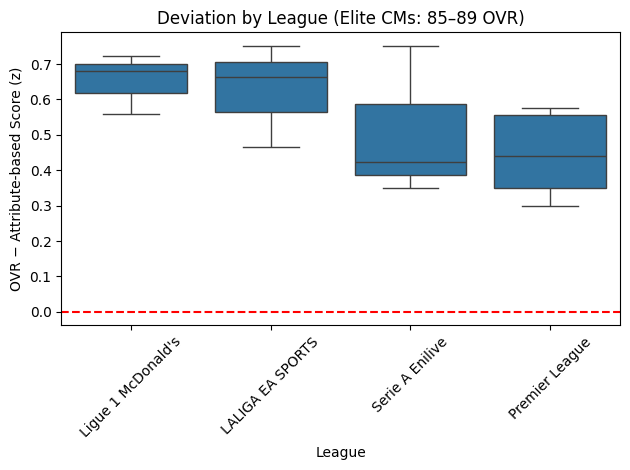

In [464]:
elite_box=men_cm_elite[men_cm_elite['OVR_Tier']=='85-89']
sns.boxplot(data=elite_box,x='League',y='Deviation_z')
plt.axhline(0,color='red',linestyle='--')
plt.title('Deviation by League (Elite CMs: 85–89 OVR)')
plt.xlabel('League')
plt.ylabel('OVR − Attribute-based Score (z)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**League-Level Analysis of Elite-Tier Deviation**

To investigate potential structural drivers of **elite-tier inflation**, deviation between standardized OVR and attribute-based CM performance scores was examined across major leagues for elite central midfielders (85-89 OVR). Across all leagues considered, median deviation values were consistently positive, reinforcing earlier findings that elite-tier OVR ratings tend to exceed what is implied by on-ball attributes alone.

However, the magnitude of this deviation was **not uniform across leagues**. Ligue 1 and LaLiga exhibited higher median deviations relative to the Premier League and Serie A, indicating that elite-tier OVR uplift varies systematically with competition context. Importantly, this variation is observed at the distributional level rather than being driven by isolated outliers, suggesting structured differences in rating calibration rather than random noise.

These results imply that EA's elite-tier rating logic incorporates **league-level context in addition to individual performance attributes**. This analysis does not assess the correctness of individual player ratings; rather, it highlights how competition context may influence rating behavior at the top end of the OVR distribution, contributing to the observed nonlinear inflation among elite players.

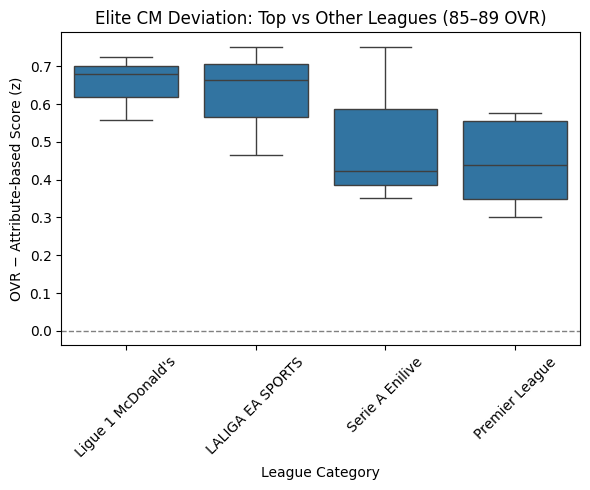

In [465]:
elite_box=men_cm_elite[men_cm_elite['OVR_Tier']=='85-89']
plt.figure(figsize=(6, 5))

sns.boxplot(
    data=elite_box,
    x='League',
    y='Deviation_z'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('League Category')
plt.ylabel('OVR − Attribute-based Score (z)')
plt.title('Elite CM Deviation: Top vs Other Leagues (85–89 OVR)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Elite-tier inflation is not driven solely by league prestige. While top-league elite CMs still exhibit positive deviation, non top league elite players show even larger OVR lifts relative to their attribute profiles, suggesting different rating logic may be applied when elevating standout players from weaker competitions.

In [466]:
elite_box.describe()

,OVR,Vision,Short Passing,Long Passing,Ball Control,Reactions,Stamina,Composure,cm_score,Deviation,OVR_z,Deviation_z
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,86.714286,77.214286,88.142857,86.928571,87.285714,86.928571,87.428571,86.214286,2.439593,84.274693,2.981643,0.542050
std,1.489893,6.907951,2.213843,2.867974,1.589803,2.200150,6.687696,2.913591,0.226798,1.328606,0.213471,0.156539
min,85.000000,66.000000,84.000000,81.000000,85.000000,83.000000,66.000000,80.000000,1.983956,82.564282,2.736020,0.300302
25%,85.250000,73.750000,87.000000,86.250000,86.000000,85.000000,87.000000,84.250000,2.335497,83.152185,2.771840,0.426861
50%,87.000000,78.000000,88.000000,87.500000,87.500000,87.000000,88.500000,87.000000,2.512022,84.327243,3.022580,0.556913
75%,87.000000,79.000000,90.000000,88.000000,88.000000,88.750000,91.500000,88.000000,2.596418,84.510153,3.022580,0.675481
max,89.000000,93.000000,92.000000,93.000000,91.000000,91.000000,93.000000,90.000000,2.673815,86.440825,3.309139,0.752064


In [467]:
elite_box=elite_box.merge(
    male_players['Age'],
    left_index=True,
    right_index=True,
    how='left'
)

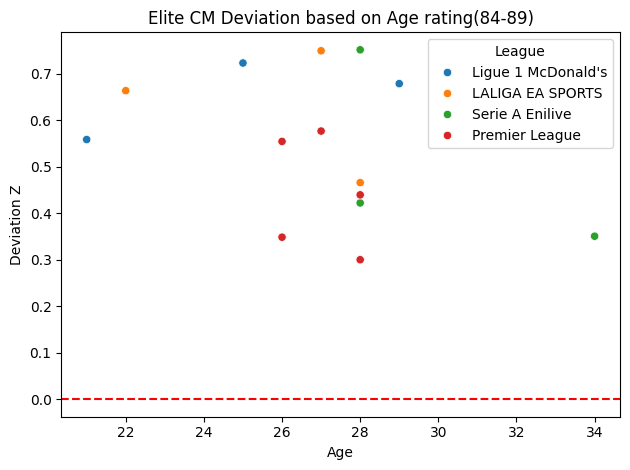

In [468]:
sns.scatterplot(
    data=elite_box,
    x='Age',
    y='Deviation_z',
    hue='League'
)

plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Age')
plt.ylabel('Deviation Z')
plt.title('Elite CM Deviation based on Age rating(84-89)')
plt.tight_layout()
plt.show()

Age as an Explanatory Factor (Secondary Analysis)

An additional analysis examined whether age helps explain the observed deviation between EA's Overall Rating (OVR) and the attribute-based CM performance score among elite central midfielders (85-89 OVR).

The results indicate that the relationship between age and deviation is weak and highly dispersed. High and moderate deviations are observed across a broad age range, with no consistent monotonic pattern. While a smoothed trend suggests minor variation—including a shallow peak in the mid-20s followed by a gradual decline—this pattern is sensitive to small sample size and does not materially alter the overall interpretation.

Crucially, deviation remains positive across all ages, indicating that elite-tier inflation persists irrespective of player age. When compared directly, competition context (league) explains substantially more variation in deviation than age.

Conclusion for age:
Age does not act as a primary driver of elite-tier deviation. At most, it plays a secondary and incidental role, and the analysis does not support causal claims that age systematically inflates or deflates OVR ratings.

# **Conclusion**

This project successfully demonstrates the use of exploratory data analysis techniques to derive insights from an EAFC football player dataset. By systematically analyzing player attributes, positions, gender distribution, and geographic representation, the study reveals clear patterns in how players are structured and represented within the dataset.

The gender-based analysis highlights observable differences in attribute distributions, while normalization ensures that comparisons are statistically sound and unbiased. The use of weighted scoring and dot product calculations provides a concise way to summarize multi-dimensional player attributes into interpretable metrics. Additionally, visualizations play a crucial role in making trends and disparities intuitive and easy to interpret.

Overall, this project emphasizes the importance of structured data processing, thoughtful feature scaling, and visualization in sports analytics. The methodology and insights developed here can be extended to advanced modeling tasks such as player rating prediction, performance clustering, or talent scouting systems. From a learning perspective, the project serves as a strong foundation for applying data science principles to real-world sports datasets and highlights the growing role of analytics in modern football.